In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=sns.load_dataset("mpg")

In [84]:
features=data[["horsepower","weight","displacement"]]

In [85]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [86]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [87]:
data.dropna(axis=1,inplace=True)

In [88]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [89]:
target=pd.Series(data['mpg'],name="mpg")

In [90]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

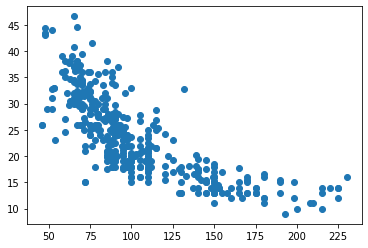

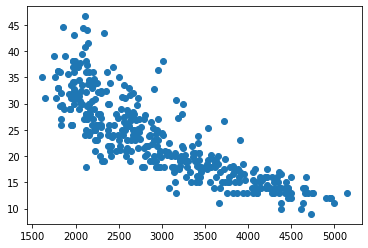

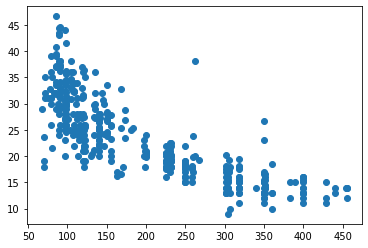

In [91]:
for i in features.columns:
    plt.scatter(features[i],target)
    np.corrcoef(features[i],target)[0][1]
    plt.show()

In [92]:
np.corrcoef(features['weight'],target)

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

In [93]:
np.corrcoef(data["weight"],data['mpg'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

In [94]:
(data['weight']==features["weight"]).sum()

392

In [95]:
data["weight"].shape

(392,)

In [96]:
features.columns

Index(['horsepower', 'weight', 'displacement'], dtype='object')

corr:  -0.7784267838977759


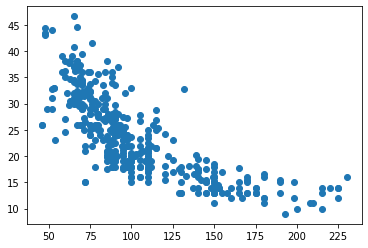

corr:  -0.8322442148315753


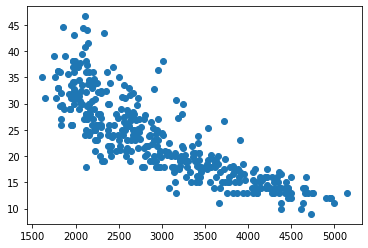

corr:  -0.8051269467104577


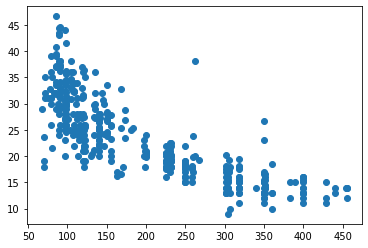

In [97]:
for i in features.columns:
    plt.scatter(features[i],target)
    print("corr: ",np.corrcoef(features[i],target)[0][1])
    plt.show()

In [98]:
for i in features.columns:
    np.corrcoef(data[i],data["mpg"])

In [99]:
target.shape

(392,)

In [100]:
target=pd.Series(data['mpg'],name="mpg")

In [101]:
target.shape

(392,)

In [102]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [127]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.1)

In [128]:
model=LinearRegression()

In [129]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
model.coef_

array([-0.0140529 , -0.00616746, -0.01238645])

In [131]:
model.intercept_

45.80494329495578

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
y_pred=model.predict(xtest)

In [134]:
y_pred[:5]

array([10.14285491, 20.70674604, 12.01690403, 11.88915454, 10.85958615])

In [135]:
ytest[:5]

28      9.0
166    13.0
158    16.0
27     11.0
39     14.0
Name: mpg, dtype: float64

In [136]:
mse=mean_squared_error(ytest,y_pred)

In [137]:
mse

18.243182768272952

In [138]:
pow(mse,0.5)

4.271203901509849

In [139]:
xtest[:5]

,horsepower,weight,displacement
28,193.0,4732,304.0
166,129.0,3169,302.0
158,150.0,4498,318.0
27,210.0,4382,318.0
39,175.0,4464,400.0


In [140]:
y_pred[:5]

array([10.14285491, 20.70674604, 12.01690403, 11.88915454, 10.85958615])

In [141]:
ytest[:5]

28      9.0
166    13.0
158    16.0
27     11.0
39     14.0
Name: mpg, dtype: float64

In [142]:
from sklearn.metrics import r2_score

In [143]:
r2_score(ytest,y_pred)

0.699445266021555

In [144]:
len(ytrain)

39

In [145]:
len(ytest)

353

In [146]:
import pickle

In [147]:
with open("mpg_model.pkl",'wb') as fp:
    pickle.dump(model,fp)
    fp.close()

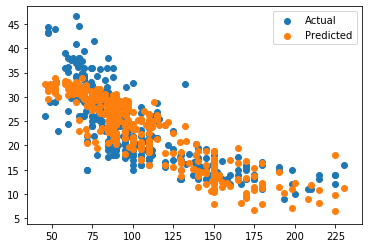

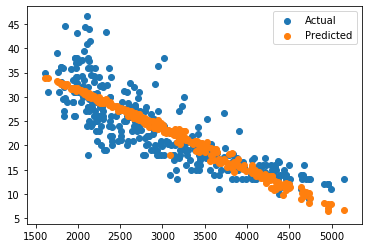

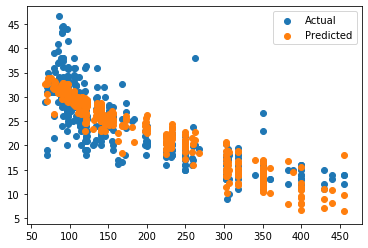

In [150]:
for i in features.columns:
    plt.scatter(xtest[i],ytest,label="Actual")
    plt.scatter(xtest[i],y_pred,label='Predicted')
    plt.legend()
    plt.show()

In [151]:
xtest[:5]

,horsepower,weight,displacement
28,193.0,4732,304.0
166,129.0,3169,302.0
158,150.0,4498,318.0
27,210.0,4382,318.0
39,175.0,4464,400.0


In [153]:
ytest[:5]

28      9.0
166    13.0
158    16.0
27     11.0
39     14.0
Name: mpg, dtype: float64